# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1: полносвязные сети

**ФИО:** Кулешов Дмитрий Сергеевич

**Факт о себе:** заслушал весь спотифай до дыр, пока делал эту домашку... Не думал, что она будет такая долгая


## Общая информация

__Дата выдачи:__ 22.09.2025

__Мягкий дедлайн:__ 23:59MSK 12.10.2025

__Жесткий дедлайн:__ 23:59MSK 19.10.2025


## Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).  Если два студента сгенерировали в нейронке одинаковые либо похожие решения, это считается плагиатом и приводит к обнулению обеих работ.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как

$$
min(part_1, part_2) \cdot 0.6 + max(part_1, part_2) \cdot 0.2 + part_3 \cdot 0.2
$$

где $part_1$, $part_2$ и $part_3$ - оценки за первую, вторую и третью части работы

> Также, за домашнее задание выставляется 0, если не сделано нулевое задание либо нет подробного описания ваших экспериментов в третьей части.

## Оформление

1. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
2. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
3. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. 

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

Из каждого проведённого эксперимента делайте выводы и фиксируйте их. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/king.png" width="300"> 
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх. 

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/bad_lines.png" width="600"> 
</center>

## О задании

Вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import random

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

Начнем с того, что скачаем и загрузим данные: (У меня винда + PyCharm со своей видеокартой, поэтому wget мне не подойдет, я переписал код)

In [2]:
# !wget -O yearpredictionmsd.zip https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip

import urllib.request
import os

if not os.path.exists("yearpredictionmsd.zip"):
    urllib.request.urlretrieve(
        "https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip", 
        "yearpredictionmsd.zip"
    )

In [3]:
df = pd.read_csv('yearpredictionmsd.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Посмотрим на статистики по данным.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

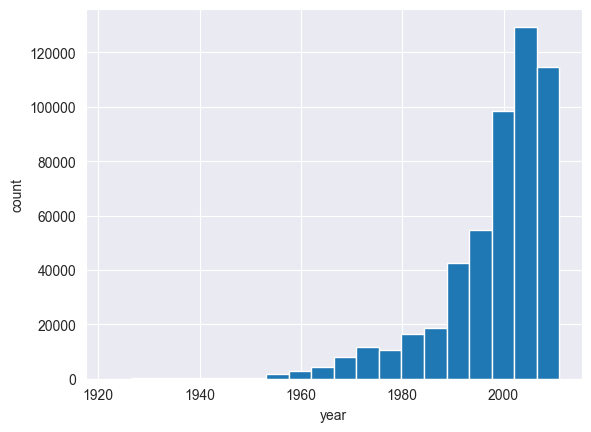

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

X_train.shape, X_test.shape

((386508, 90), (128837, 90))

## Полезные советы:

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Если вы чего-то не знаете, не стесняйтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению и `pytorch`. Но не забывайте, что за списанный код без ссылки на источник последует наказание.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так.

- Пользуйтесь утилитами, которые вам предоставляет `pytorch` (например, `Dataset` и `Dataloader`). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего, вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

- При желании вы можете логгировать метрики обучения и свои эксперименты в WandB либо любой другой сервис. Не забудьте приложить к тетрадке ссылку на результаты экспериментов либо скришноты графиков с пояснениями, что проверяющий должен на них увидеть.

- Финальное значение тестовой метрики для удобства проверки выведите в тетрадке.

## Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями.
2. Обучите `StandertScaler` и предобработайте ваши данные. В следующих заданиях можете использовать другой `scaler` или вообще отказаться от него.


In [7]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = set_global_seed(42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_rmse = 1000
best_lambda = 0
reg_lambdas = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
for reg_lambda in reg_lambdas:
    model = Ridge(alpha=reg_lambda)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse_for_model = root_mean_squared_error(y_test, y_pred)
    if rmse_for_model < best_rmse:
        best_rmse = rmse_for_model
        best_lambda = reg_lambda

print(f"best RMSE у Ridge: {best_rmse}, lambda = {best_lambda}")

best RMSE у Ridge: 9.473629925446899, lambda = 0.01


> Учитывая, что у нас предсказывается год и большая часть промежутка ответов в 1990-2010, то Ridge регрессия не особо хорошо себя показала. Слишком большая ошибкад для таких данных

In [9]:
# Просто для себя, посмотреть че там лежит в ответах

model = Ridge(alpha=0.01)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([1993.0673493 , 1990.08139497, 1991.08330555, ..., 1996.97099771,
       2001.89952064, 1999.59960125], shape=(128837,))

Лучшая константа для RMSE это среднее. Используйте среднее, расчитанное на трэйне в качестве прогноза для теста и посчитайте для такой наивной модели RMSE.

In [10]:
class ConstantModel:
    def __init__(self):
        self.value = 0
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.DataFrame):
        self.value = y_train.mean()
        
    def predict(self, X_test: pd.DataFrame):
        return pd.array([self.value] * X_test.shape[0])


model = ConstantModel()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse_for_model = root_mean_squared_error(y_test, y_pred)
print(f"RMSE у Constant: {rmse_for_model}, value = {model.value}")

RMSE у Constant: 10.845542969687791, value = 1998.3753660985026


> Как мы видим, у нас не сильно отличается наша модель от константной. Значит, и одна, и вторая, не очень умные, не уловили какие-то связи и т.д. Короче говоря, не довольны результатом 

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию. Тестовую выборку мы будем использовать только для того, чтобы измерить итоговую метрику качества модели.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Часть I. Обучаем линейную регрессию (максимум 10 баллов)

**Задание 1 (10 баллов):** Обучите в `pytorch` линейную регрессию. 

- Создайте модель линейной регрессии, которая будет состоять только из одного `Linear()` слоя.
   
- Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки `pytorch`. Для подсчета градиента воспользуйтесь методом backward.
   
- Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
   
- Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача &mdash; убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

Заимствовал куски кода из [семинарской тетрадки c 1 семинара 2 группы](./sem01_dirty.ipynb)

In [12]:
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1024, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)

https://pypi.org/project/tqdm/

https://proproprogs.ru/nn_pytorch/pytorch-optimizatory-realizaciya-sgd-na-pytorch
https://proproprogs.ru/nn_pytorch/pytorch-klassy-linear-i-module (как подружиться с nn.Module и писать собственные нейросетки из модулей, наследуясь от него)

Заимствовал куски кода из [семинарской тетрадки c 1 семинара 2 группы](./sem01_dirty.ipynb)

In [13]:
def RMSE(y_pred, y_true):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

class MyLinearLayer(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__() # вызов инициализатора базового класса
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size)
        )
        # создание и инициализация переменных модуля
 
    def forward(self, x):
        # реализация прямого прохода вектора x по нейронной сети
        # возврат тензора с выходными значениями нейронной сети
        h = torch.flatten(x, start_dim=1)
        return self.model(h)
    

class SGDOptimizer:
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr

    def zero_grad(self):
        for w in self.params:
            if w.grad is not None:
                w.grad.zero_()

    def step(self):
        for param in self.params:
            param.data -= param.grad * self.lr

Заимствовал куски кода из [семинарской тетрадки c 1 семинара 2 группы](./sem01_dirty.ipynb) (причем дальше тоже с нее много копипасты)

In [14]:
def plot_losses(train_losses, test_losses):
    clear_output()
    fig, axs = plt.subplots(1, 1, figsize=(13, 4))
    axs.plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs.plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs.set_ylabel('loss')

    axs.set_xlabel('epoch')
    axs.legend()

    plt.show()

def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    """Одна эпоха обучения"""
    train_loss = 0.0
    model.train()
    c = 0
    for X, y in tqdm(train_loader, desc=tqdm_desc):
        X = X.to(device)
        y = y.to(device)
        if c < 20:
            print(f'size(X) = {X.shape}, size(y) = {y.shape}')
            c += 1
        optimizer.zero_grad()
        logits = model(X)
        if c < 10:
            print(f'size(logits) = {logits.shape}')
            c += 1
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X.shape[0]

    train_loss /= len(train_loader.dataset)
    return train_loss

@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    """Прогнозы на валидации"""

    val_loss = 0.0
    model.eval()
    for X, y in tqdm(test_loader, desc=tqdm_desc):
        X = X.to(device)
        y = y.to(device)

        logits = model(X)
        loss = criterion(logits, y)

        val_loss += loss.item() * y.shape[0]

    val_loss /= len(test_loader.dataset)
    return val_loss


def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, scheduler=None):
    """Обучение модели"""

    train_losses = []
    val_losses = []

    for epoch in range(1, num_epochs + 1):
        train_loss = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        val_loss = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # функция для смены lr по расписанию
        if scheduler is not None:
            scheduler.step()

        plot_losses(train_losses, val_losses)
    return train_losses, val_losses

In [15]:
for x, y in train_dataset:
    print(x.shape, y.shape)
    break

torch.Size([90]) torch.Size([])


In [16]:
device

'cuda'

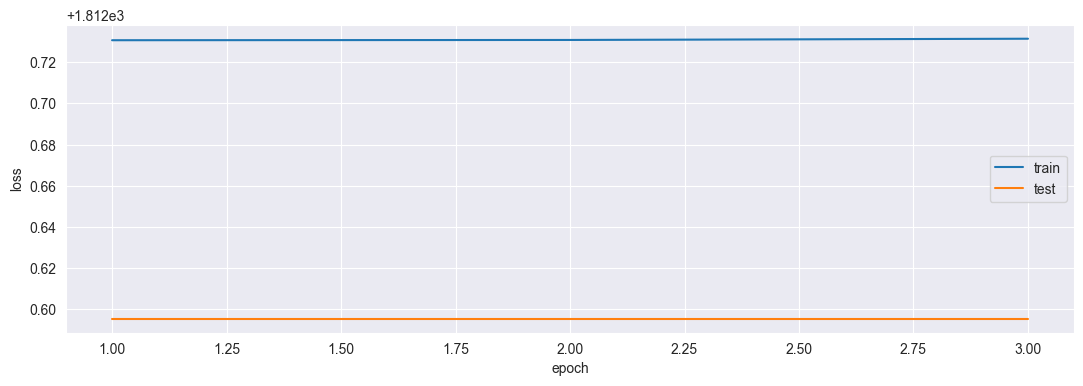

[1812.730724514805, 1812.7308511204174, 1812.7314543510959]

In [17]:
IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 1
NUM_EPOCHS = 3
LR = 0.01

model = MyLinearLayer(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = RMSE
optimizer = SGDOptimizer(model.parameters(), LR)
losses_train, _ = train(model, optimizer, criterion, train_loader, val_loader, num_epochs=NUM_EPOCHS)
losses_train

> Что-то странное, мне не нравится, очень много минусов (нужно и хорошую структуру нейронки писать, и добавить предобработку данных, и регуляризацию, и нормальный оптимайзер)

## Часть II. Заводим нейронную сеть (максимум 10 баллов)

Ниже нам предстоит реализовать довольно много различных нейросетей и поставить целую серию экспериментов. Чтобы это всё происходило без боли и страданий, нам нужно держать код в удобном виде.

При решении заданий вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. При необходимости вы можете добавить в них любые нужные вам аргументы и любой нужный функционал. Более того, хорошей практикой является не делать эти функции слишком громоздкими и выносить разные хитрые штуки в отдельные функции.

In [18]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    """Одна эпоха обучения
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        tqdm_desc - Prefix for the progressbar.
    """
    
    train_loss = 0.0
    model.train()  # переключение модели в режим тренировки
    for X, y in tqdm(train_loader, desc=tqdm_desc):
        X = X.to(device)
        y = y.to(device)
        
        # print(f'size(X) = {X.shape}, size(y) = {y.shape}')

        optimizer.zero_grad()
        logits = model(X)
        # print(f'size(logits) = {logits.shape}')
        loss = criterion(logits, y)
        # print(loss)
        loss.backward()

        optimizer.step()

        train_loss += loss.item() * X.shape[0]

    train_loss /= len(train_loader.dataset)
    return train_loss


@torch.no_grad()
def validation_epoch(model, criterion, val_loader, tqdm_desc):
    """Одна эпоха валидации модели
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """
    val_loss = 0.0
    model.eval()
    for X, y in tqdm(val_loader, desc=tqdm_desc):
        X = X.to(device)
        y = y.to(device)

        logits = model(X)
        loss = criterion(logits, y)

        val_loss += loss.item() * y.shape[0]

    val_loss /= len(val_loader.dataset)
    return val_loss


@torch.no_grad()
def predict(model, data_loader, shift):
    """ Предсказания модели
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
        shift -> смещение ответов, обычно np.min(y_train)
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    
    model.eval()  # переключение модели в режим вычислений
    predicts = [shift + model(X).argmax(dim=1) for X, _ in data_loader]
    return torch.cat(predicts)


def train(model, optimizer, criterion, train_loader, val_loader, epochs):
    """ Обучение модели
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        epochs - number of training epochs
    """
    
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        train_loss = training_epoch(model, optimizer, criterion, train_loader, tqdm_desc=f'Training {epoch}/{epochs}')
        val_loss = validation_epoch(model, criterion, val_loader, tqdm_desc=f'Validating {epoch}/{epochs}')

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        plot_losses(train_losses, val_losses)
    
    return train_losses, val_losses

**Задание 2 (2 балла)**

Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве метрики качества мы используем RMSE. При его подсчёте вам нужно заменить предсказанный нейросеткой класс на конкретный год выпуска песни и использовать его как прогноз. 

In [19]:
class MyNN(nn.Module):
    def __init__(self, in_features, hidden_size, out_classes):
        # print(out_classes)
        super().__init__()
        
        # Делаем вот такой слабенький сэндвич
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=out_classes)
        )
 
    def forward(self, X):
        h = torch.flatten(X, start_dim=1)
        return self.model(h)
    
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_true, y_pred):
        loss = torch.sqrt(self.mse(y_true, y_pred))
        return loss

# def RMSE(y_pred, y_true):
#     return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

In [20]:
print(y_train)
print(y_train - np.min(y_train))

CLASSES = np.max(y_train) - np.min(y_train) + 1
print(f'classes: {CLASSES}')

[2001 1996 2009 ... 2003 1977 1999]
[79 74 87 ... 81 55 77]
classes: 90


In [21]:
y_train_classes = torch.LongTensor(y_train - np.min(y_train))
y_train_probabilities = F.one_hot(y_train_classes, num_classes=CLASSES).float()

y_val_classes = torch.LongTensor(y_val - np.min(y_train))
y_val_probabilities = F.one_hot(y_val_classes, num_classes=CLASSES).float()

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train_probabilities))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val_probabilities))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)

In [22]:
IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 4
LR = 0.01

model = MyNN(IN_FEATURES, HIDDEN_SIZE, CLASSES).to(device)
criterion = RMSE
optimizer = SGDOptimizer(model.parameters(), LR)

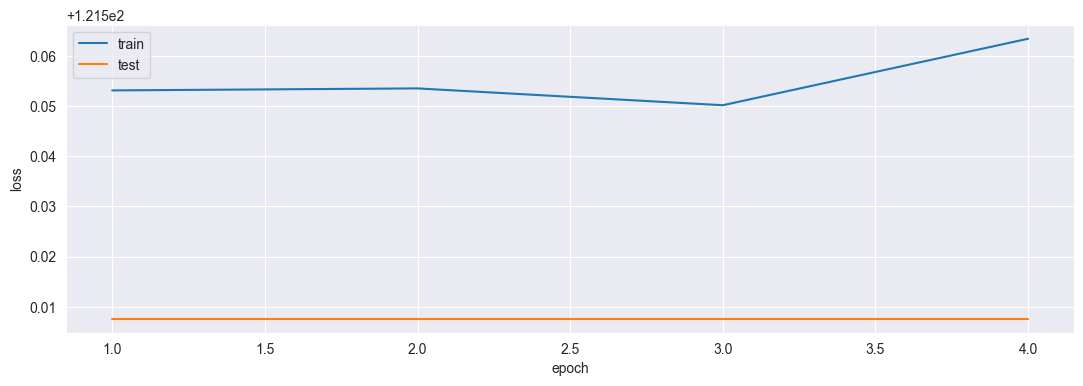

[121.55315603224201, 121.55355509059952, 121.55019865835749, 121.5634704531626]
[121.50758884718165, 121.50758884718165, 121.50758884718165, 121.50758884718165]


In [23]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

**Задание 3 (1 балл).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Побить бейзлайн не получилось(((( Нет, идея крайне не хорошая, у нас года могут быть разные, а может в тестовой придут новые года с новыми песнями, я не хочу переобучивать ее каждый год. Надо делать регрессию


**Задание 4 (2 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [24]:
class MyNN_v2(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        
        # Делаем вот такой слабенький сэндвич
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=1)
        )
 
    def forward(self, X):
        h = torch.flatten(X, start_dim=1)
        return self.model(h)

In [25]:
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)

In [26]:
IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 4
LR = 0.01

model = MyNN_v2(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = SGDOptimizer(model.parameters(), LR)

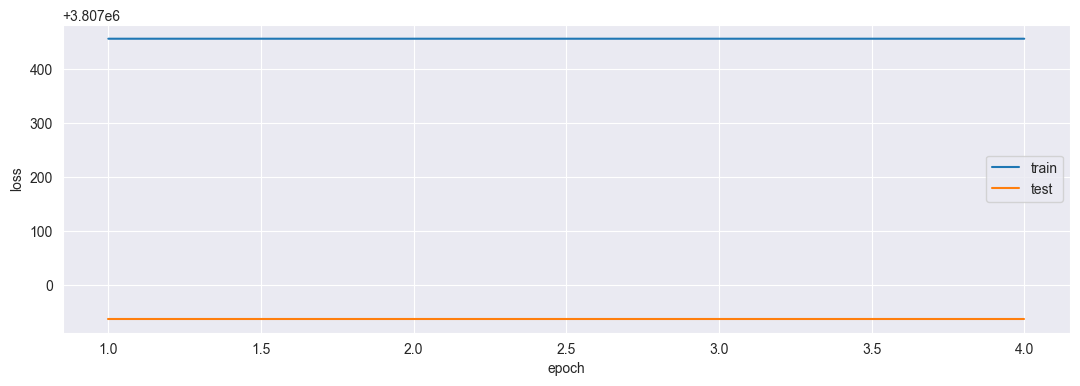

[3807456.4020934454, 3807456.401267244, 3807456.4005497084, 3807456.401159441]
[3806938.3981211255, 3806938.3981211255, 3806938.3981211255, 3806938.3981211255]


In [27]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

**Задание 5 (1 балл).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Пока что не помогло, должна быть нормализация, у нас данные вжались в конец выборки, это силньо мешает учиться нейронке

**Задание 6 (1 балл).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [28]:
MIN_VALUE = None
MAX_VALUE = None

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    global MIN_VALUE
    global MAX_VALUE
    return (sample - MIN_VALUE) / (MAX_VALUE - MIN_VALUE)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    global MIN_VALUE
    global MAX_VALUE
    return sample * (MAX_VALUE - MIN_VALUE) + MIN_VALUE

**Задание 7 (1 балл)** Теперь повторите эксперимент из **задания 4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [45]:
class MyNN_v3(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        
        # Делаем вот такой слабенький сэндвич
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)

In [56]:
MIN_VALUE = y_train.min()
MAX_VALUE = y_train.max()

y_train_normalized = normalize(y_train)
y_val_normalized = normalize(y_val)

y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)

In [57]:
IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 4
LR = 0.001

model = MyNN_v3(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = SGDOptimizer(model.parameters(), LR)

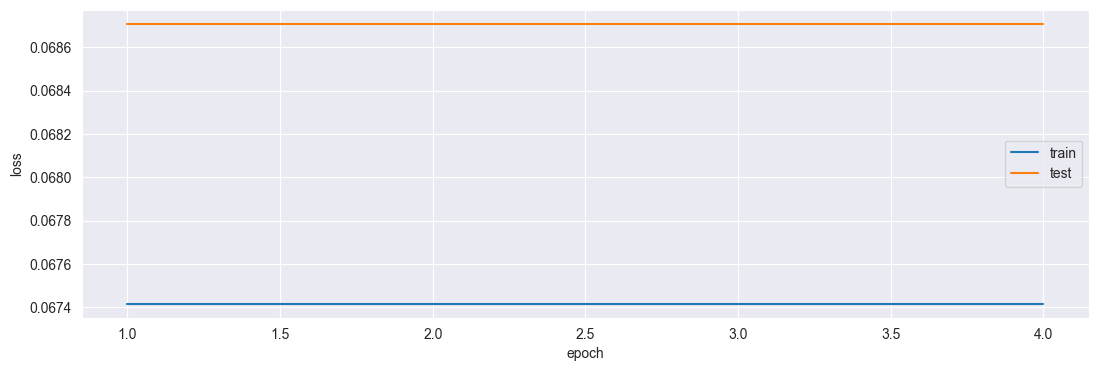

[0.06741580413983274, 0.06741580410077824, 0.06741580412466844, 0.06741580413861188]
[0.06870918920402652, 0.06870918920402652, 0.06870918920402652, 0.06870918920402652]


In [50]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

> Чуть лучше, но все равно плохо

**Задание 8 (2 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

x_train_std = std_scaler.fit_transform(X_train)
x_val_std = std_scaler.transform(X_val)

# y_train и y_val уже отнормированы, переменные мы не меняли c прошлого задания, не будем заново нормировать

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)

In [59]:
IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 6
LR = 0.004

model = MyNN_v3(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), LR)

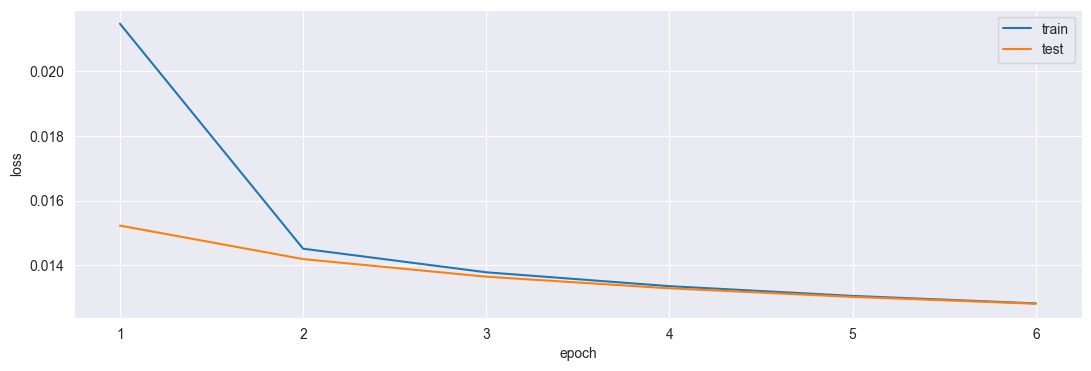

[0.021474166873417917, 0.014511032878679582, 0.013780993011539726, 0.013351729446267946, 0.013050324808684469, 0.012817914025722896]
[0.015226621677618873, 0.01418968548916253, 0.013644497882752257, 0.013285182851127581, 0.013019386494316772, 0.012808416320060618]


In [60]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

Вооооооот, уже хотя бы что-то более лучшее, хотя всё еще странное. Кстати говоря, только сейчас решил использовать готовый оптимайзер вместо самописного, поэтому теперь график идёт на убывание. Посмотрим на RMSE нашей модели

In [68]:
print("\nВеса первого слоя напрямую:")
first_layer_weights = model.model[2].weight
print(f"First layer weights shape: {first_layer_weights.shape}")
print(first_layer_weights)


Веса первого слоя напрямую:
First layer weights shape: torch.Size([1, 128])
Parameter containing:
tensor([[ 0.0554,  0.0617, -0.0753,  0.1374, -0.0193, -0.0054,  0.0492, -0.0833,
         -0.0210, -0.0300,  0.1489,  0.0395,  0.1277,  0.0812,  0.0258,  0.0798,
          0.0939, -0.0545,  0.0732, -0.0750,  0.0718,  0.0725,  0.1131,  0.0591,
          0.1119, -0.0070, -0.0154,  0.0367,  0.0382, -0.0738, -0.0311,  0.0208,
          0.0728,  0.0847,  0.0769, -0.0727,  0.0117,  0.0276,  0.0676,  0.1318,
          0.0247, -0.0506,  0.1051, -0.0424,  0.0201,  0.0822,  0.0827,  0.0026,
          0.0903, -0.0272,  0.0433,  0.0870,  0.0968, -0.0027,  0.1815,  0.0119,
          0.0865,  0.0570,  0.1491,  0.0610, -0.0710,  0.0117,  0.0109,  0.0296,
          0.0361,  0.0673,  0.1367,  0.0782,  0.0596,  0.0802,  0.0534, -0.0586,
          0.0937,  0.0059,  0.0055,  0.1291,  0.1006,  0.0945,  0.1224,  0.0460,
          0.0316,  0.1321,  0.0070,  0.0311, -0.0678, -0.0426,  0.0747,  0.0705,
          

In [65]:
X_test_tensor = torch.Tensor(std_scaler.fit_transform(X_test)).to(device)
model.eval()
result = model(X_test_tensor).detach().to("cpu").numpy()
denormalize(result)

array([[1996.86629021],
       [1988.19745064],
       [1993.65101629],
       ...,
       [2003.9523167 ],
       [2000.88507891],
       [2001.09713352]], shape=(128837, 1))

In [66]:
root_mean_squared_error(y_test, denormalize(result))

9.953122515981438

Ради интереса я даже посмотрел веса и ответы модели. Я долго думал и нашел ошибку (раньше выдавались единички). Я не нормализовал тестовые данные. Теперь все отлично

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть III. Улучшаем нейронную сеть (максимум 10 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 9 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

## Momentum

In [73]:
class MyNN_v3(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 5
LR = 0.002

model = MyNN_v3(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0.7)

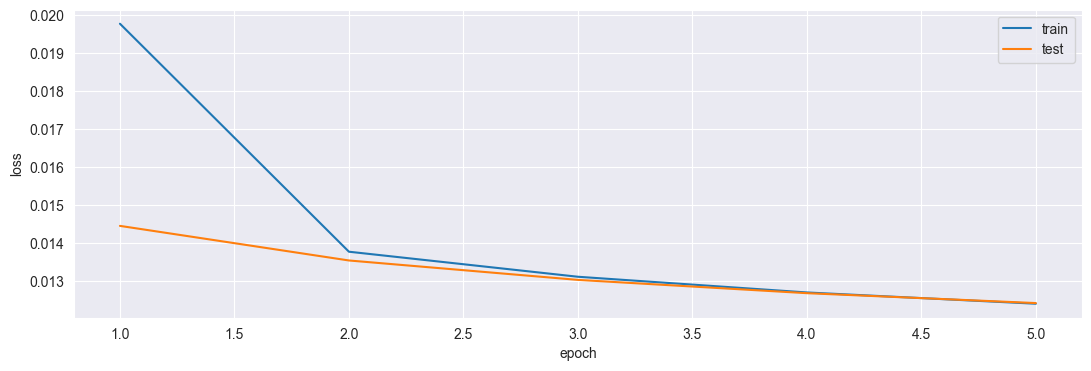

[0.019780515785183764, 0.013781251211640219, 0.013122400181772206, 0.01270918424521312, 0.012412716325897721]
[0.014460994967323552, 0.013550761794800357, 0.013039775221324856, 0.0126902916885605, 0.012429843043913933]


In [74]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

> Примерно такой же результат (капельку лучше), что и раньше, учитывая, что я пытался подобрать хороший коэф моментума. Не сильно интересует

## Adam

In [75]:
class MyNN_v3(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128
NUM_EPOCHS = 5
LR = 0.001

model = MyNN_v3(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

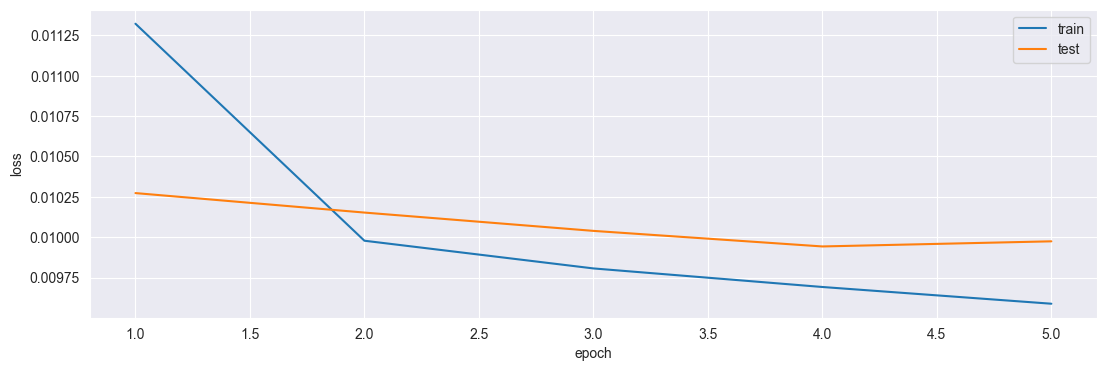

[0.011322347101592717, 0.009978202906819188, 0.00980662268863774, 0.00969162315862194, 0.0095879912588047]
[0.010273292814772206, 0.010152614439352161, 0.010039187036498051, 0.009942744177422413, 0.009974502420524257]


In [76]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

> Вот тут уже интересно. Результат довольно впечатляющий с первого же раза без подбора параметров. Но оно и ясно. ADAM = ADA + Momentum

**Задание 10 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

## Ширина++

In [85]:
class MyNN_v3(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE = 128 * 4
NUM_EPOCHS = 10
LR = 0.001

model = MyNN_v3(IN_FEATURES, HIDDEN_SIZE).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

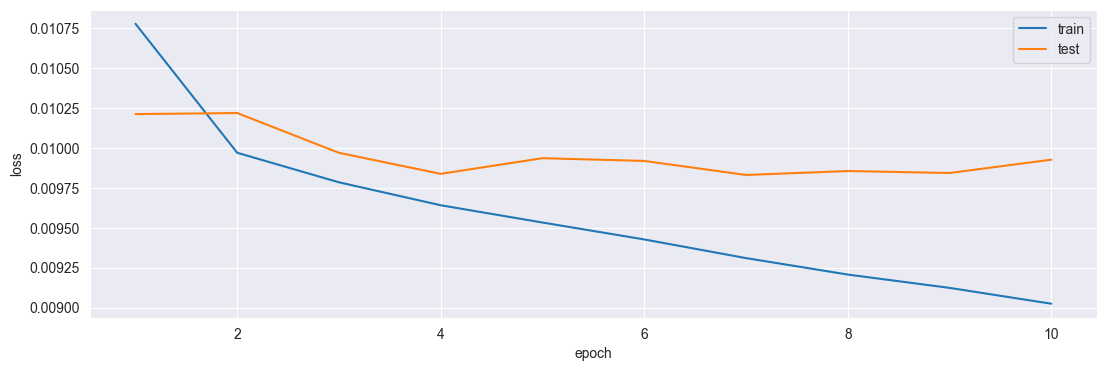

[0.010777163998409382, 0.009969375392603095, 0.009784544020518945, 0.009640875807094015, 0.009532812873107041, 0.009426911973423956, 0.009310112186572874, 0.009207105199455522, 0.009123725631596585, 0.009024619083039592]
[0.010211557804146325, 0.010217998407419725, 0.009969111328975272, 0.009837547409699285, 0.009935563695133225, 0.009918378132696847, 0.009830490195866395, 0.009855140768963587, 0.009842860227863846, 0.00992624412836098]


In [86]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

## Глубина++

In [87]:
class MyNN_v4(nn.Module):
    def __init__(self, in_features, hidden_size_1, hidden_size_2):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size_1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_1, out_features=hidden_size_2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_2, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE_1 = 128
HIDDEN_SIZE_2 = 64
NUM_EPOCHS = 10
LR = 0.001

model = MyNN_v4(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

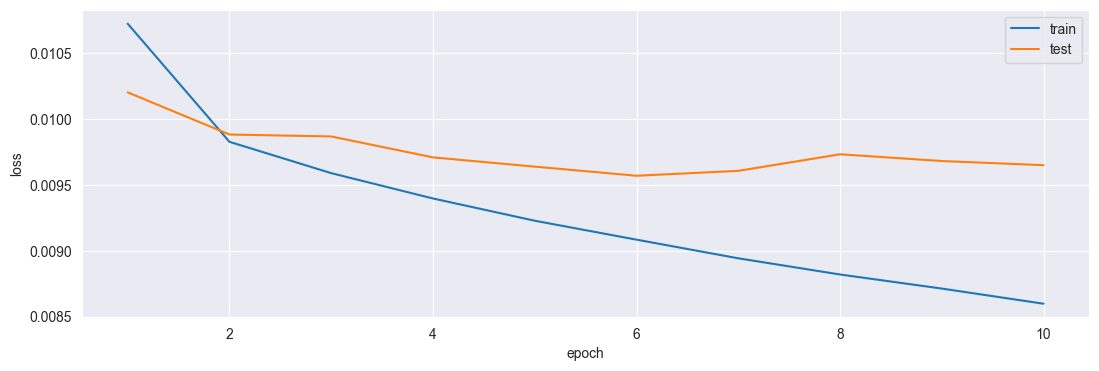

[0.01072263337879135, 0.009826620613839663, 0.009588902076977815, 0.009396746962416493, 0.009227933917481904, 0.009084277830564045, 0.00894283697055839, 0.008819978054871683, 0.008713199859286128, 0.008598290008820609]
[0.010201872858960835, 0.009881940485274859, 0.009867404760579632, 0.009708620942351058, 0.00963841624172169, 0.00956922925849322, 0.00960643272837588, 0.009732058272956041, 0.009680930211418866, 0.00964941568042407]


In [88]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

1. Расширение в ширину:
Не сильно улучшает ситуацию, а в конце обучения явно показывает переобучение, ошибка на тесте даже возрастает
2. Расширение в глубину:
Уменьшило ошибку чуть сильнее, чем ширина, но тоже переобучается((((( Надо фиксить

**Задание 11 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

## Дропаут

In [93]:
class MyNN_v5(nn.Module):
    def __init__(self, in_features, hidden_size_1, hidden_size_2):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size_1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_1, out_features=hidden_size_2),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_2, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE_1 = 128
HIDDEN_SIZE_2 = 64
NUM_EPOCHS = 10
LR = 0.001

model = MyNN_v5(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

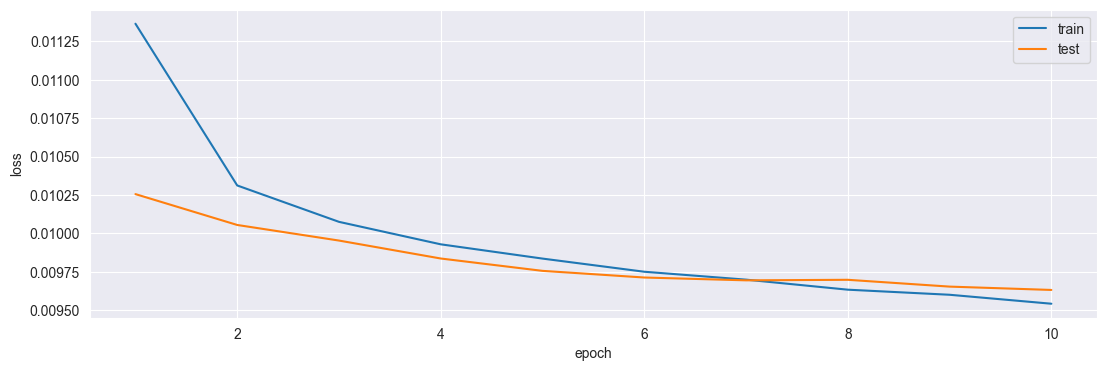

[0.011365197247719982, 0.010312277238286776, 0.01007539515421205, 0.009929064172798851, 0.009836194405725187, 0.009750551391458757, 0.009699088885701168, 0.009633764389557018, 0.00960067230670139, 0.009542361408239892]
[0.010255947460646054, 0.010055056907879568, 0.009953538127861645, 0.009836727952582908, 0.009756275847666513, 0.009712981375484413, 0.009694563022733334, 0.009698075560892075, 0.009653748957861663, 0.009632027964734906]


In [94]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

## Батчнорм

In [95]:
class MyNN_v6(nn.Module):
    def __init__(self, in_features, hidden_size_1, hidden_size_2):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size_1),
            nn.BatchNorm1d(hidden_size_1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_1, out_features=hidden_size_2),
            nn.BatchNorm1d(hidden_size_2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size_2, out_features=1),
            nn.Sigmoid()
        )
 
    def forward(self, X):
        return self.model(X)



y_train_reshaped = y_train_normalized.reshape(-1, 1)
y_val_reshaped = y_val_normalized.reshape(-1, 1)

train_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_train_std), torch.Tensor(y_train_reshaped))
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(x_val_std), torch.Tensor(y_val_reshaped))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, worker_init_fn=seed_worker, generator=g)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0, worker_init_fn=seed_worker, generator=g)


IN_FEATURES = X_train.shape[1]
HIDDEN_SIZE_1 = 128
HIDDEN_SIZE_2 = 64
NUM_EPOCHS = 10
LR = 0.001

model = MyNN_v6(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

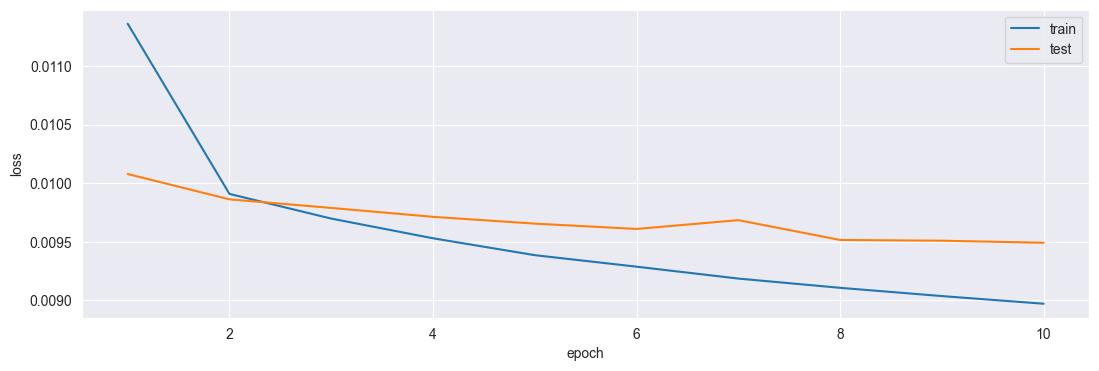

[0.011361738973043855, 0.009908185203750879, 0.009697647058725228, 0.00952937974245051, 0.0093852461766627, 0.009286911482880083, 0.009185316477483966, 0.009106352717363342, 0.009035836375078437, 0.008970536564818521]
[0.010078227922391072, 0.009861932461344463, 0.00978850139794449, 0.009712561805411756, 0.00965450340213815, 0.009609165524696787, 0.009684237941703205, 0.009515235487100692, 0.009508632216966892, 0.00949119800385581]


In [96]:
losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(losses_train)
print(losses_val)

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

Дропаут лучше "успокоил" нейронку, сильнее штрафовал за переобучение, в целом, для этого и создан. Батчнорм тоже дал какой-то эффект, но не такой сильный. Короче говоря, работает хорошо, добились еще больших успехов. Причем графики прямо очень хорошо показывают, как дропаут чуть ли не "схлопывает" трейн и тест, приводя их к среднему результату (лучше для теста и для жизни), а батчнорм это делает совсем немного.

**Задание 12 (1 балл).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению RMSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения). Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости RMSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [97]:
def calculate_rmse(model):
    X_test_tensor = torch.Tensor(std_scaler.fit_transform(X_test)).to(device)
    model.eval()
    result = model(X_test_tensor).detach().to("cpu").numpy()
    return root_mean_squared_error(y_test, denormalize(result))

In [100]:
parameters = {
    "lr": [0.00001, 0.0001, 0.001, 0.01],
    "weight_decay": [0, 0.000001, 0.00001, 0.001, 0.001]
}

results_lr = {i: 0 for i in parameters["lr"]}
results_wd = {i: 0 for i in parameters["weight_decay"]}

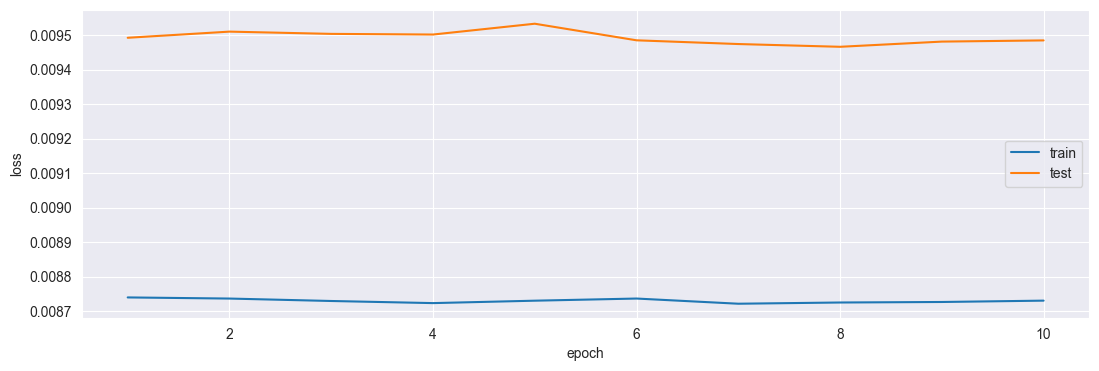

In [101]:
for lr in parameters["lr"]:
    cur_model = MyNN_v5(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
    optimizer = torch.optim.Adam(cur_model.parameters(), lr=lr)
    losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
    results_lr[lr] = calculate_rmse(cur_model)

In [102]:
results_lr

{1e-05: 37.254489233996836,
 0.0001: 35.7494659159027,
 0.001: 33.72993450609339,
 0.01: 30.520428556988726}

In [ ]:
best_lr = None

In [ ]:
for wd in parameters["weight_decay"]:
    cur_model = MyNN_v6(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
    optimizer = torch.optim.Adam(cur_model.parameters(), lr=best_lr, weight_decay=wd)
    losses_train, losses_val = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
    results_wd[wd] = calculate_rmse(cur_model)

In [ ]:
results_wd

In [ ]:
best_wd = None

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

До дедлайна 9 минут, а я только что заметил, что я неправильную модельку использовал (v6 вместо v5, да еще и подсчёт неправильный где-то, слишком большие rmse вышли((((( Тильт... Надеюсь, на следующие домашки я буду тратить больше времени и на них смогу просрок использовать, а тут сэкономлю за счёт 2б, извините((

> Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 13 (6 баллов).**

Думаю направление размышлений вы поняли. Постарайтесь с помощью своих экспериментов выбить максимально возможное значение RMSE на тестовой выборке. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 8.90 $ &mdash; 2 балла
- $\text{RMSE} \le 8.80 $ &mdash; 4 балла
- $\text{RMSE} \le 8.75 $ &mdash; 6 баллов

**Различные трюки, которые можно попробовать:**

1. Попробуйте делать во время обучения раннюю остановку обучения и сохранять модель в тот момент, когда качество на валидации начало ухудшаься, то есть модель начала переобучаться
2. Попробуйте усложнить архитектуру нейросет
    - Больше/меньше нейронов
    - Больше/меньше слоёв
    - Другие функции активации (tanh, relu, leaky relu, elu etc)
    - Регуляризация (dropout, l1,l2)
3. Попробуйте другие оптимизаторы, а также смену скорости обучения по расписанию.

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... Попробовать несколько значений, как мы делали в заданиях выше, адекватно, но делать какой-то огромный перебор будет самоубийством.

Логгируйте свои эксперименты. За один прогон пробуйте одно изменение. Иначе будет непонятно какие именно изменения улучшили качество, а какие ухудшили. 

In [ ]:
best_model = MyNN_v6(IN_FEATURES, HIDDEN_SIZE_1, HIDDEN_SIZE_2).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=best_lr, weight_decay=best_wd)
_, _ = train(model, optimizer, criterion, train_loader, val_loader, NUM_EPOCHS)
print(calculate_rmse(best_model))

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

Я решил использовать все параметры из прошлого + AdamW оптимайзер (не доделал(((( )

## Бонус (0.1 балла)

Прикрепите фотографию того, как вы начали этот сентябрь. Какую самую классную эмоцию вы испытали за прошедший месяц?

__место для картики и эмоции__
да тильт, какие тут эмоции, не успел сделать последнее самое интересное задание, а до дд 8 минут уже(((